In [305]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [322]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler

In [307]:
data = pd.read_csv('/content/drive/My Drive/blood/transfusion.data')

feature_names = ["Recency","Frequency","Monetary","Time","Donated_Blood"]
dframe = pd.DataFrame(data)

fname = dframe.columns

dframe.columns = feature_names

X = dframe.drop("Donated_Blood", axis=1)
y = dframe["Donated_Blood"]

dframe.head()

,Recency,Frequency,Monetary,Time,Donated_Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [308]:
# Initial dataset size
orig_rows = dframe.shape
print("This is the original row: ", dframe.shape)

orig_cols = dframe.shape
print("This is the original column: ", dframe.shape)


dframe = data.drop_duplicates()
new_data = dframe.dropna()


# Updated dataset size
updated_rows = dframe.shape
print("\nThis is the updated row: ", dframe.shape)

updated_cols = dframe.shape
print("This is the updated column: ", dframe.shape)

# Display basic information about the dataset after cleaning
print("\nDataset Information After Cleaning:")
print(dframe.info())

# Display summary statistics of the dataset after cleaning
print("\nSummary Statistics After Cleaning:")
print(dframe.describe())

# Summary of cleaning process
print("\nCleaning Summary:")
print(f"Initial Dataset Size: {orig_rows} rows, {orig_cols} columns")
print(f"Updated Dataset Size: {updated_rows} rows, {updated_cols} columns")
print(f"Rows Removed: {[a - b for a, b in zip(orig_rows, updated_rows)]}")
print(f"Columns Removed: {[a - b for a, b in zip(orig_cols, updated_cols)]}")

This is the original row:  (748, 5)
This is the original column:  (748, 5)

This is the updated row:  (533, 5)
This is the updated column:  (533, 5)

Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            533 non-null    int64
 1   Frequency (times)                           533 non-null    int64
 2   Monetary (c.c. blood)                       533 non-null    int64
 3   Time (months)                               533 non-null    int64
 4   whether he/she donated blood in March 2007  533 non-null    int64
dtypes: int64(5)
memory usage: 25.0 KB
None

Summary Statistics After Cleaning:
       Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
count        533.000000         533.000000             533.000000   


In [309]:
mean = dframe.mean()
median = dframe.median()
mode = dframe.mode()

print(f"\nThis is the mean:")
print(mean)
print(f"\nThis is the median:")
print(median)
print(f"\nThis is the mode:")
print(mode)


This is the mean:
Recency (months)                                 9.529081
Frequency (times)                                6.990619
Monetary (c.c. blood)                         1747.654784
Time (months)                                   42.303940
whether he/she donated blood in March 2007       0.279550
dtype: float64

This is the median:
Recency (months)                                 8.0
Frequency (times)                                5.0
Monetary (c.c. blood)                         1250.0
Time (months)                                   38.0
whether he/she donated blood in March 2007       0.0
dtype: float64

This is the mode:
   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                  3                    750             28   

   whether he/she donated blood in March 2007  
0                                           0  


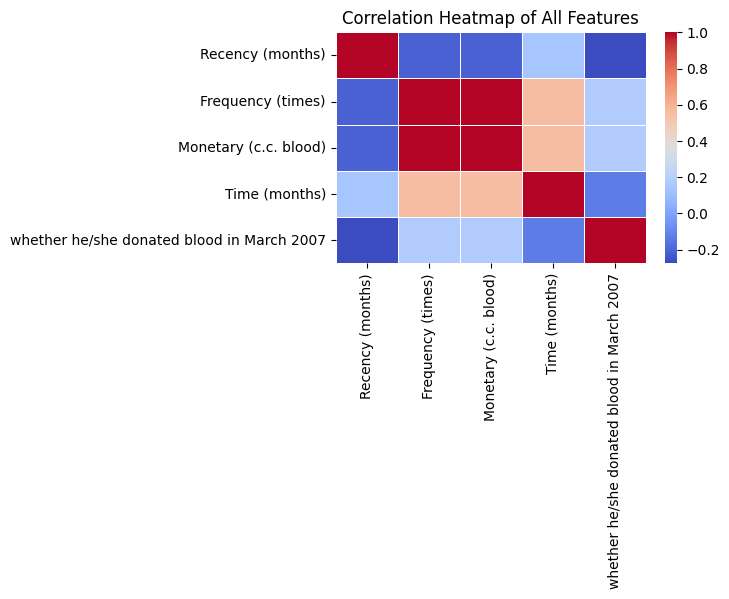

In [310]:
# Calculate correlation matrix for all features
correlation_matrix_all = dframe.corr()

# Plot correlation heatmap for all features
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix_all, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()


 Index(['Recency', 'Frequency', 'Monetary', 'Time'], dtype='object')


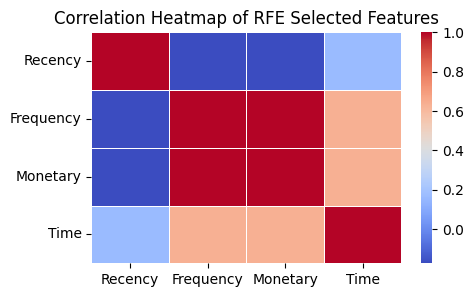

In [311]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RFE object and specify the number of features to select
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)

# Fit RFE to training data (excluding the target variable)
rfe.fit(X_train, y_train)

# Transform the training and testing data to include only the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Convert selected features to DataFrame
dframe_selected_features = pd.DataFrame(X_train_selected, columns=[feature_names[i] for i, selected in enumerate(rfe.support_) if selected])

print("\n", dframe_selected_features.columns)

# Calculate correlation matrix for selected features
correlation_matrix_selected = dframe_selected_features.corr()

# Plot correlation heatmap for selected features
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix_selected, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of RFE Selected Features')
plt.show()

In [312]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracies without cross validation
Logistic Regression: 0.7600
AdaBoost: 0.8067
Bagging: 0.7000
Decision Tree: 0.6733
Random Forest: 0.7333
SVM: 0.7533

Accuracies with cross validation
Logistic Regression: 0.7776
AdaBoost: 0.7894
Bagging: 0.7408
Decision Tree: 0.7408
Random Forest: 0.7609
SVM: 0.7809


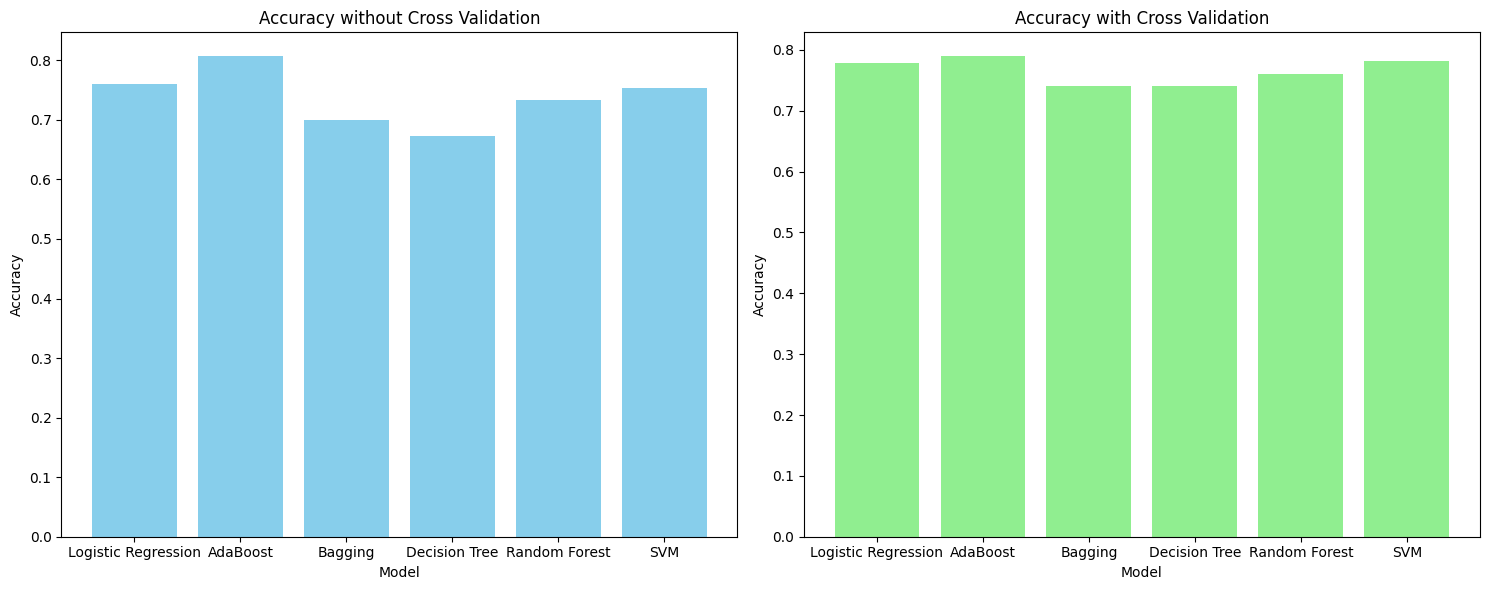

In [323]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Results without cross-validation
accuracies_no_cv = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    accuracies_no_cv[name] = model.score(X_test_scaled, y_test)

print("Accuracies without cross validation")
for name, acc in accuracies_no_cv.items():
    print(f"{name}: {acc:.4f}")

# Results with cross-validation
accuracies_cv = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    accuracies_cv[name] = np.mean(cv_scores)

print("\nAccuracies with cross validation")
for name, acc in accuracies_cv.items():
    print(f"{name}: {acc:.4f}")

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot without cross-validation
ax[0].bar(accuracies_no_cv.keys(), accuracies_no_cv.values(), color='skyblue')
ax[0].set_title('Accuracy without Cross Validation')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')

# Bar plot with cross-validation
ax[1].bar(accuracies_cv.keys(), accuracies_cv.values(), color='lightgreen')
ax[1].set_title('Accuracy with Cross Validation')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

**RANKING WITHOUT CROSS VALIDATION**     

1 - ADABOOST                                 

2 - LOGISTIC REGRESSION

3 - SVM

4 - RANDOM FOREST

5 - BAGGING

6 -  DECISSION TREE


**RANKING WITH CROSS VALIDATION**

1 - ADABOOST

2 - SVM

3 - LOGISTIC REGRESSION

4 - RANDOM FOREST

5 - BAGGING AND DECISION TREE (SAME RESULT)

                  Model  Accuracy      Feature Selection
0   Logistic Regression  0.777633           All Features
1              AdaBoost  0.789356           All Features
2               Bagging  0.740826           All Features
3         Decision Tree  0.740798           All Features
4         Random Forest  0.760854           All Features
5                   SVM  0.780938           All Features
6   Logistic Regression  0.760000  RFE Selected Features
7              AdaBoost  0.806667  RFE Selected Features
8               Bagging  0.700000  RFE Selected Features
9         Decision Tree  0.653333  RFE Selected Features
10        Random Forest  0.720000  RFE Selected Features
11                  SVM  0.760000  RFE Selected Features


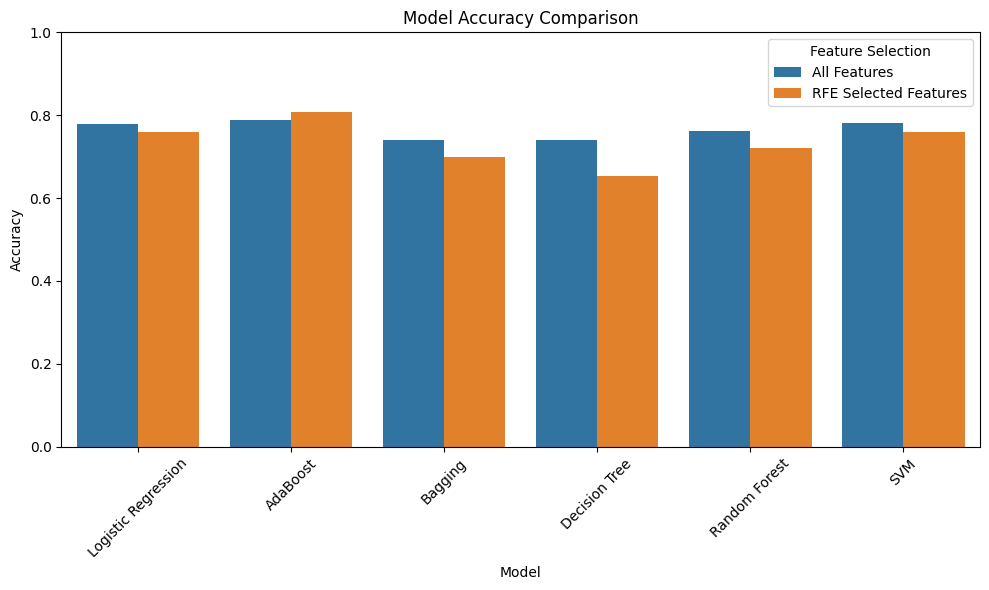

In [321]:
# Train and evaluate models with RFE-selected features
results_rfe_selected_features = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    results_rfe_selected_features[name] = accuracy

# Plotting
results_df = pd.DataFrame({
    "Model": list(accuracies_cv.keys()) + list(results_rfe_selected_features.keys()),
    "Accuracy": list(accuracies_cv.values()) + list(results_rfe_selected_features.values()),
    "Feature Selection": ['All Features'] * len(models) + ['RFE Selected Features'] * len(models)
})

print(results_df)


plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Feature Selection')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
plt.legend(title='Feature Selection')
plt.tight_layout()
plt.show()